In [130]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import json
import time
import requests
import pprint
import codecs
import random
from config import weatherApiKey

#randomly select 500 cities from the city list (saved as txt but is .json format)
file = "city.list.json"
cities = json.load(codecs.open(file, 'r', 'utf-8-sig')) #the codecs package is needed because of the way the json filew was created. Would get the following error: Unexpected UTF-8 BOM (decode using utf-8-sig): line 1 column 1 (char 0)
#len(cities) #provides 209579 cities

def ListCreator(data,list):
    for i in data:
        list.append(i['id'])       

CityIdList = []
ListCreator(cities, CityIdList)
CitySample = random.sample(CityIdList, 500)

In [131]:
#for each city, find its temperature, wind speed, humidity, cloudiness and latitude
#download this information from openweathermap.org
variables = ['id','city', 'country',  'lon', 'lat', 'tempMax', 'windSpd', 'humidity', 'cloudiness']
base = 'http://api.openweathermap.org/data/2.5/weather?APPID='+ weatherApiKey

df = pd.DataFrame(columns = variables)
#build for loop to run through the city list
for i in CitySample:
    city = str(i)
    url = base + '&id=' + city
    data = requests.get(url).json()
    name = data['name']
    print(f'looking up data for {name}')
    country = data['sys']['country']
    lon = data['coord']['lon']
    lat = data['coord']['lat']
    tempMax = (((data['main']['temp_max'])- 273.15) * 9/5 + 32) #kelvin to Farenheit
    windSpd = data['wind']['speed']
    humidity = data['main']['humidity']
    cloudiness = data['clouds']['all']
    row = [city, name, country, lon, lat, tempMax, windSpd, humidity, cloudiness]

    tempdf = pd.DataFrame([row], columns = variables)
    #store this data as a dataframe
    df = df.append(tempdf)
    
#print(df)


looking up data for Ciutadilla
looking up data for Irsha
looking up data for Bong
looking up data for Vallejuelo
looking up data for Corgémont
looking up data for Maricao
looking up data for Cond
looking up data for Ati
looking up data for La Brugère
looking up data for Cowra
looking up data for Avola
looking up data for Ripley
looking up data for Willingshausen
looking up data for Castrillo del Val
looking up data for Algarrobo
looking up data for Le Plessis-Mace
looking up data for Baisha
looking up data for Ganzow
looking up data for Hohenseeden
looking up data for Garat
looking up data for Odiongan
looking up data for Affeltrangen
looking up data for San Miquel
looking up data for Indian Head Park
looking up data for Guia de Isora
looking up data for Pfronstetten
looking up data for Santillana del Mar
looking up data for Oberstenfeld
looking up data for Jeffreyston
looking up data for Umbrías
looking up data for Aricagua
looking up data for Bohot
looking up data for Voves
looking u

looking up data for Khamgaon
looking up data for Taoxian
looking up data for Gaohang
looking up data for Biberwier
looking up data for Creighton
looking up data for Montebello
looking up data for Dohm-Lammersdorf
looking up data for Muvattupula
looking up data for Tagana-an
looking up data for Hekou
looking up data for Zabolotiv
looking up data for Derwent Valley
looking up data for Saint-Pierre-du-Mont
looking up data for Kostino
looking up data for Restigné
looking up data for Northlake
looking up data for Vorob’yëvo
looking up data for Angol
looking up data for Weitershain
looking up data for Rosemont
looking up data for Baihua
looking up data for Guizikeng
looking up data for El Viejo
looking up data for Quebracho Herrado
looking up data for Briar
looking up data for Llanera
looking up data for Bethlehem
looking up data for Somma Lombardo
looking up data for Tréguier
looking up data for Evosmos
looking up data for Baselt
looking up data for Bo
looking up data for Gouvernorat de Sid

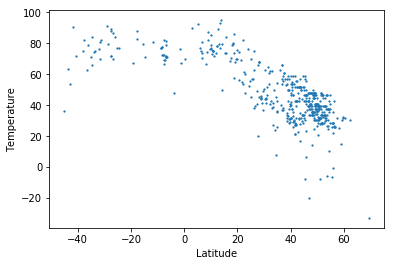

In [141]:

#build scatterplots:
# Temperature (F) vs. Latitude
plt.scatter(df['lat'], df['tempMax'], s=1.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

#print(df.head())

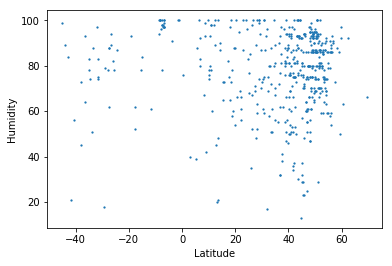

In [142]:
# Humidity (%) vs. Latitude
plt.scatter(df['lat'], df['humidity'], s=1.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()


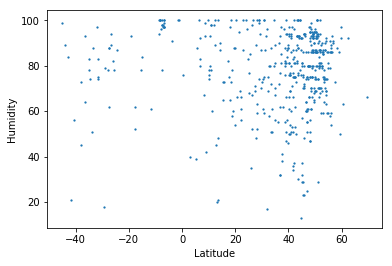

In [146]:
# Cloudiness (%) vs. Latitude
plt.scatter(df['lat'], df['humidity'], s=1.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

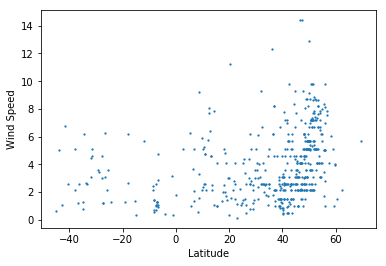

In [147]:
# Wind Speed (mph) vs. Latitude
plt.scatter(df['lat'], df['windSpd'], s=1.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

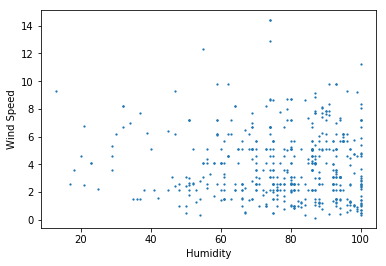

In [148]:
plt.scatter(df['humidity'], df['windSpd'], s=1.5)
plt.xlabel("Humidity")
plt.ylabel("Wind Speed")
plt.show()